# matplotlib 入門 (11) nitta@tsuda.ac.jp

# 11章: 3Dグラフ

## 11-1: 3Dグラフをプロットする (plot_wireframe)

3Dのグラフを描画するためには、plt.subplots() のパラメータで
<code>subplot_kw =  { 'projection' : '3d' }</code>
を与える。

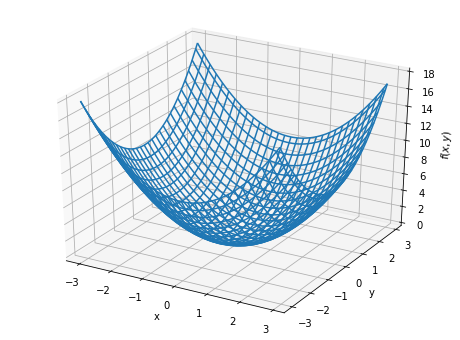

In [ ]:
# 11-1-1
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

def func(x, y):
    z = x * x + y * y
    return z

x = np.arange(-3, 3, 0.1)
y = np.arange(-3, 3, 0.1)

X, Y = np.meshgrid(x, y)  # 2次元の格子座標を生成する
Z = func(X, Y)

fig, ax = plt.subplots(1, 1, figsize=(8,6), subplot_kw={'projection' : '3d'})
ax.plot_wireframe(X, Y, Z)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel(r'$f(x,y)$')

plt.show()

または、生成した Figure の中に、新しく 3D 用の Axes (Axes3D) を生成して、その中に描画する。

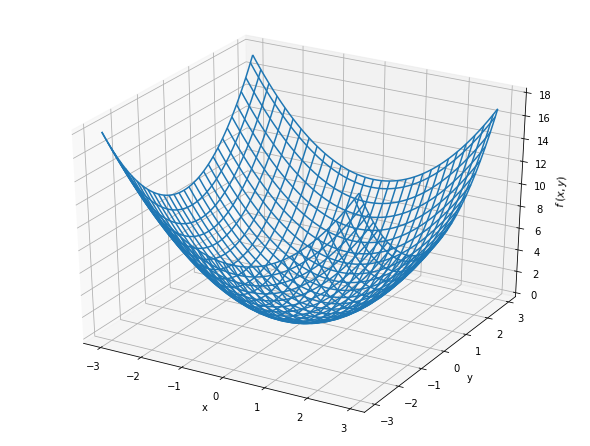

In [ ]:
# 11-1-2
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d

def func(x, y):
    z = x * x + y * y
    return z

x = np.arange(-3, 3, 0.1)
y = np.arange(-3, 3, 0.1)

X, Y = np.meshgrid(x, y)  # 2次元の格子座標を生成する
Z = func(X, Y)

fig, ax = plt.subplots(figsize=(8,6))  # Figure object を生成する
ax2 = axes3d.Axes3D(fig)               # Axes3D object を Figure の中に生成する
ax2.plot_wireframe(X, Y, Z)

ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel(r'$f~(x,y)$')

plt.show()

## 11-2: 3Dグラフをプロットする (plot_surface)

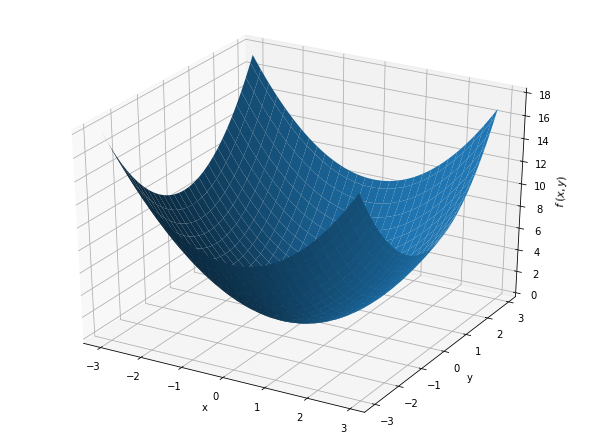

In [ ]:
# 11-2
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d

def func(x, y):
    z = x * x + y * y
    return z

x = np.arange(-3, 3, 0.1)
y = np.arange(-3, 3, 0.1)

X, Y = np.meshgrid(x, y)  # 2次元の格子座標を生成する
Z = func(X, Y)

fig, ax = plt.subplots(figsize=(8,6))  # Figure object を生成する
ax2 = axes3d.Axes3D(fig)               # Axes3D object を Figure の中に生成する
ax2.plot_surface(X, Y, Z)

ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel(r'$f~(x,y)$')

plt.show()

## 11-3: パラメトリック曲線を 3D 表示する (Axes3D.plot)


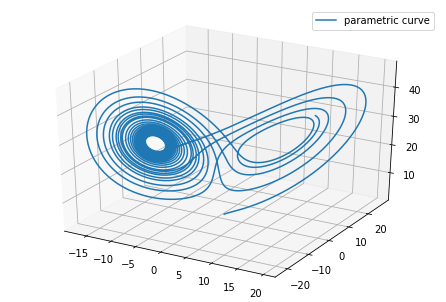

In [ ]:
# source code 11-3
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d

# データを用意する
dt = 0.001
ts = np.arange(0.001, 20, dt)

def lorenz(x, y, z, dt, p=10, r=28, b=8/3):
    dx = dt * (p * (-x + y))
    dy = dt * (-x * z + r * x - y)
    dz = dt * (x * y - b * z)
    return dx, dy, dz

def rungeKutta(x, y, z, dt, f):
    x0, y0, z0 = f(x, y, z, dt)
    x1, y1, z1 = f(x+x0/2., y+y0/2., z+z0/2., dt)
    x2, y2, z2 = f(x+x1/2., y+y1/2., z+z1/2., dt)
    x3, y3, z3 = f(x+x2, y+y2, z+z2, dt)
    xn = x + (x0 + 2. * (x1+x2) + x3)/6.
    yn = y + (y0 + 2. * (y1+y2) + y3)/6.
    zn = z + (z0 + 2. * (z1+z2) + z3)/6.
    return xn, yn, zn

x, y, z = 1., 1., 1.
xs, ys, zs = [], [], []
for t in ts:
    x, y, z = rungeKutta(x, y, z, dt, lorenz)
    xs.append(x)
    ys.append(y)
    zs.append(z)

fig = plt.figure()
ax = axes3d.Axes3D(fig)    # FigureにAxes3Dを配置する

# 3Dに表示する
ax.plot(xs, ys, zs, label='parametric curve')
ax.legend()  # 凡例

plt.show()

## 11-4: 2D データのヒストグラムを 3D 化してプロットする (bar3d)

2Dのデータで作成したヒストグラムを3D表示する。

In [ ]:
# sample code 11-4-1
import numpy

_x = np.arange(3)
_y = np.arange(5)

_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

print(_x, _y)
print(_xx, _yy)
print(x, y)

[0 1 2] [0 1 2 3 4]
[[0 1 2]
 [0 1 2]
 [0 1 2]
 [0 1 2]
 [0 1 2]] [[0 0 0]
 [1 1 1]
 [2 2 2]
 [3 3 3]
 [4 4 4]]
[0 1 2 0 1 2 0 1 2 0 1 2 0 1 2] [0 0 0 1 1 1 2 2 2 3 3 3 4 4 4]


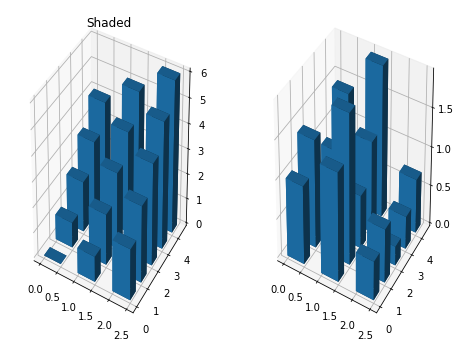

In [ ]:
# sample code 11-4-2
# 2Dのヒストグラムを3D棒グラフとして描画する
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d

top = x + y
bottom = np.zeros_like(top)
width = depth = 0.5

top2 = np.abs(np.sin(x+y) + np.cos(x-y))

fig = plt.figure(figsize=(8,6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.bar3d(x, y, bottom, width, depth, top)
ax1.set_title('Shaded')

ax2 = fig.add_subplot(122, projection='3d')
ax2.bar3d(x, y, bottom, width, depth, top2)

plt.show()